In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('.//Team Frames//avalanche.csv')
other_csvs = ['.//Team Frames//blackhawks.csv', './/Team Frames//bluejackets.csv', './/Team Frames//blues.csv', './/Team Frames//bruins.csv', './/Team Frames//canadiens.csv',
'.//Team Frames//canucks.csv', './/Team Frames//capitals.csv', './/Team Frames//coyotes.csv', './/Team Frames//devils.csv', './/Team Frames//ducks.csv',
'.//Team Frames//flames.csv', './/Team Frames//flyers.csv', './/Team Frames//goldenknights.csv', './/Team Frames//hurricanes.csv', './/Team Frames//islanders.csv',
'.//Team Frames//jets.csv', './/Team Frames//kings.csv', './/Team Frames//kraken.csv', './/Team Frames//leafs.csv', './/Team Frames//lightning.csv',
'.//Team Frames//oilers.csv', './/Team Frames//panthers.csv', './/Team Frames//penguins.csv', './/Team Frames//predators.csv', './/Team Frames//rangers.csv',
'.//Team Frames//redwings.csv', './/Team Frames//sabres.csv', './/Team Frames//senators.csv', './/Team Frames//sharks.csv', './/Team Frames//stars.csv',
'.//Team Frames//thrashers.csv', './/Team Frames//wild.csv']

for csv in other_csvs:
    temp = pd.read_csv(csv)
    df = pd.concat([df, temp])


df.dropna(inplace=True)
df.reset_index(inplace=True)
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x[0:10], format='%Y/%m/%d'))
df.drop(columns=['points', 'goals_against', 'power_play', 'penalty_kill', 'shots', 'shots_against', 'FOWp', 'index'], inplace=True)
df.tail()

,team,date,goals,opponent,identifier,rolling_points_5,rolling_points_10,rolling_points_20,rolling_goals_5,rolling_goals_10,rolling_ga_5,rolling_ga_10,rolling_pp_5,rolling_pk_5,rolling_shots_5,rolling_sa_5,rolling_fow_5
36863,Minnesota Wild,2022-04-22,6,Seattle Kraken,vs,1.8,1.6,1.65,4.2,4.2,3.0,3.0,15.66,88.34,30.6,29.2,46.20
36864,Minnesota Wild,2022-04-24,5,Nashville Predators,@,1.8,1.6,1.75,4.8,4.3,3.2,3.2,23.66,85.00,32.2,27.6,49.50
36865,Minnesota Wild,2022-04-26,3,Arizona Coyotes,vs,2.0,1.8,1.75,4.8,4.6,2.8,3.0,22.72,82.00,34.4,26.6,51.78
36866,Minnesota Wild,2022-04-28,3,Calgary Flames,vs,1.6,1.7,1.65,4.4,4.6,3.0,3.1,22.72,77.00,36.4,25.8,49.52
36867,Minnesota Wild,2022-04-29,4,Colorado Avalanche,vs,1.6,1.7,1.65,4.6,4.3,3.4,3.0,37.72,77.00,35.4,27.2,51.90


In [66]:
df.rolling_points_5 = df.rolling_points_5 / 2
df.rolling_points_10 = df.rolling_points_10 / 2
df.rolling_points_20 = df.rolling_points_20 / 2
df.rolling_pp_5 = df.rolling_pp_5 / 100
df.rolling_pk_5 = df.rolling_pk_5 / 100
df.rolling_fow_5 = df.rolling_fow_5 / 100

In [81]:
df_home = df[df['identifier'] == 'vs']
df_home.drop(columns=['identifier'], inplace=True)
df_away = df[df['identifier'] == '@']
df_away.drop(columns=['identifier'], inplace=True)

merged_df = pd.merge(df_home, df_away, how='left', left_on=['date', 'opponent'], right_on=['date', 'team'])
merged_df.drop(columns=['opponent_x', 'opponent_y'], inplace=True)
merged_df.head()

c:\Users\cbarg\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,team_x,date,goals_x,rolling_points_5_x,rolling_points_10_x,rolling_points_20_x,rolling_goals_5_x,rolling_goals_10_x,rolling_ga_5_x,rolling_ga_10_x,...,rolling_points_20_y,rolling_goals_5_y,rolling_goals_10_y,rolling_ga_5_y,rolling_ga_10_y,rolling_pp_5_y,rolling_pk_5_y,rolling_shots_5_y,rolling_sa_5_y,rolling_fow_5_y
0,Colorado Avalanche,2005-11-21,2,0.4,0.65,0.600,2.8,3.4,3.4,3.0,...,0.600,3.4,2.9,2.8,2.0,0.2708,0.7056,33.8,25.2,0.5246
1,Colorado Avalanche,2005-11-27,6,0.5,0.55,0.575,3.2,3.4,3.0,3.1,...,0.675,2.8,2.7,2.4,2.4,0.1100,0.8120,28.4,30.0,0.4410
2,Colorado Avalanche,2005-12-04,4,0.6,0.55,0.650,3.8,3.2,3.2,3.0,...,0.575,2.4,3.2,2.4,2.5,0.2072,0.8472,28.8,27.6,0.5102
3,Colorado Avalanche,2005-12-07,4,0.6,0.55,0.600,4.0,3.4,3.0,3.1,...,0.425,2.8,2.7,3.2,3.2,0.1202,0.7700,24.8,35.8,0.5178
4,Colorado Avalanche,2005-12-12,2,0.4,0.55,0.600,3.2,3.5,3.8,3.2,...,0.800,2.8,3.8,2.2,2.2,0.2050,0.8310,28.0,30.4,0.4890


In [90]:
merged_df['rolling_points_10_div'] = merged_df.rolling_points_10_x - merged_df.rolling_points_10_y
merged_df['rolling_points_20_div'] = merged_df.rolling_points_20_x - merged_df.rolling_points_20_y
merged_df['rolling_goals_5_div'] = merged_df.rolling_goals_5_x - merged_df.rolling_goals_5_y
merged_df['rolling_goals_10_div'] = merged_df.rolling_goals_10_x - merged_df.rolling_goals_10_y
merged_df['rolling_ga_5_div'] = merged_df.rolling_ga_5_y - merged_df.rolling_ga_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_ga_10_div'] = merged_df.rolling_ga_10_y - merged_df.rolling_ga_10_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_pp_5_div'] = merged_df.rolling_pp_5_x - merged_df.rolling_pp_5_y
merged_df['rolling_pk_5_div'] = merged_df.rolling_pk_5_x - merged_df.rolling_pk_5_y
merged_df['rolling_shots_5_div'] = merged_df.rolling_shots_5_x - merged_df.rolling_shots_5_y
merged_df['rolling_sa_5_div'] = merged_df.rolling_sa_5_y - merged_df.rolling_sa_5_x #reversed so that a higher number means home team is better in that area
merged_df['rolling_fow_5_div'] = merged_df.rolling_fow_5_x - merged_df.rolling_fow_5_y
merged_df['result'] = np.where(merged_df.goals_x > merged_df.goals_y, 1, 0)

merged_df.dropna(inplace=True)

In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17143 entries, 0 to 18462
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   team_x                 17143 non-null  object        
 1   date                   17143 non-null  datetime64[ns]
 2   goals_x                17143 non-null  int64         
 3   rolling_points_5_x     17143 non-null  float64       
 4   rolling_points_10_x    17143 non-null  float64       
 5   rolling_points_20_x    17143 non-null  float64       
 6   rolling_goals_5_x      17143 non-null  float64       
 7   rolling_goals_10_x     17143 non-null  float64       
 8   rolling_ga_5_x         17143 non-null  float64       
 9   rolling_ga_10_x        17143 non-null  float64       
 10  rolling_pp_5_x         17143 non-null  float64       
 11  rolling_pk_5_x         17143 non-null  float64       
 12  rolling_shots_5_x      17143 non-null  float64       
 13  r

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['rolling_points_10_div','rolling_points_20_div', 'rolling_goals_5_div', 'rolling_goals_10_div',
'rolling_ga_5_div', 'rolling_ga_10_div', 'rolling_pp_5_div', 'rolling_pk_5_div', 'rolling_shots_5_div', 'rolling_sa_5_div', 'rolling_fow_5_div']
X = merged_df[feature_cols]
y = merged_df.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\cbarg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1374,  836],
       [ 991, 1085]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

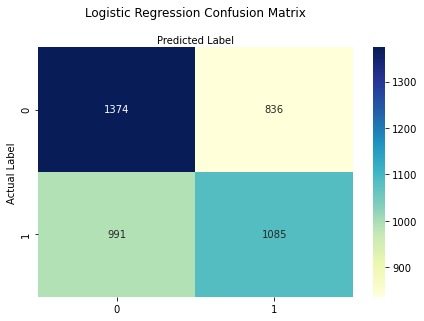

In [97]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5737284181054596
Precision: 0.5648099947943779
Recall: 0.5226396917148363


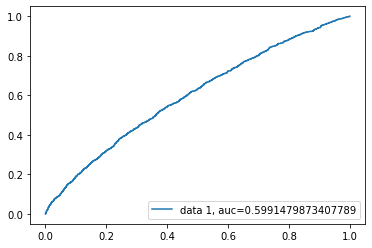

In [96]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

Text(0.5, 257.44, 'Predicted Label')

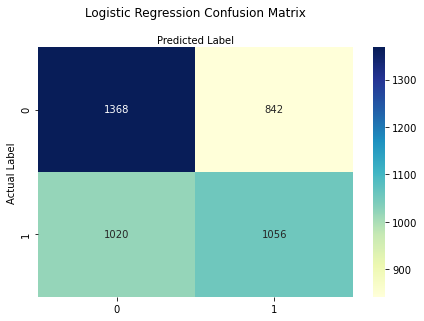

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5655622958469435
Precision: 0.5563751317175974
Recall: 0.5086705202312138
